## Environment Setup

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

## Load Data

In [7]:
url = "https://raw.githubusercontent.com/MMagdys/MAGIC-Gamma-Telescope-Classification/master/magic04.data"

cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv(url,names=cols)

In [8]:
df['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [9]:
# Ensure 'class' column is of string type
df['class'] = df['class'].astype(str)
# Strip any leading/trailing spaces and convert to lowercase
df['class'] = df['class'].str.strip().str.lower()
# Mapping 'g' to 1 and 'h' to 0
df['class'] = df['class'].map({'g': 1, 'h': 0})

df['class'].value_counts()

class
1    12332
0     6688
Name: count, dtype: int64

In [10]:
# for label in cols[:-1]:
#   plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
#   plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
#   plt.title(label)
#   plt.ylabel("Probability")
#   plt.xlabel(label)
#   plt.legend()
#   plt.show()

## Train, Validation, Test Datasets

In [11]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [12]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7379
4033


In [13]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [14]:
class_counts = df['class'].value_counts()
print(class_counts)

class
1    12332
0     6688
Name: count, dtype: int64


In [15]:
train,x_train,y_train = scale_dataset(train,oversample=True)
valid,x_valid,y_valid = scale_dataset(valid,oversample=False)
test,x_test,y_test = scale_dataset(test,oversample=False)

In [16]:
print(len(y_train))
print("Y = 1 : " , sum(y_train==1))
print("Y = 0 : " , sum(y_train==0))

14758
Y = 1 :  7379
Y = 0 :  7379


## KNN


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
y_pred = knn_model.predict(x_test)

In [20]:
print(y_pred)

[1 1 1 ... 0 1 1]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1357
           1       0.82      0.89      0.85      2447

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



# KNN

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [24]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.40      0.49      1357
           1       0.72      0.88      0.79      2447

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



# SVM

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [27]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1357
           1       0.87      0.91      0.89      2447

    accuracy                           0.86      3804
   macro avg       0.85      0.83      0.84      3804
weighted avg       0.85      0.86      0.85      3804



# NN


In [28]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [29]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(num_nodes, activation="relu"),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )

    nn_model.compile(
        tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=["accuracy"]
    )

    history = nn_model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0,
    )

    return nn_model, history


16 nodes, dropout 0, lr 0.01, batch size 32


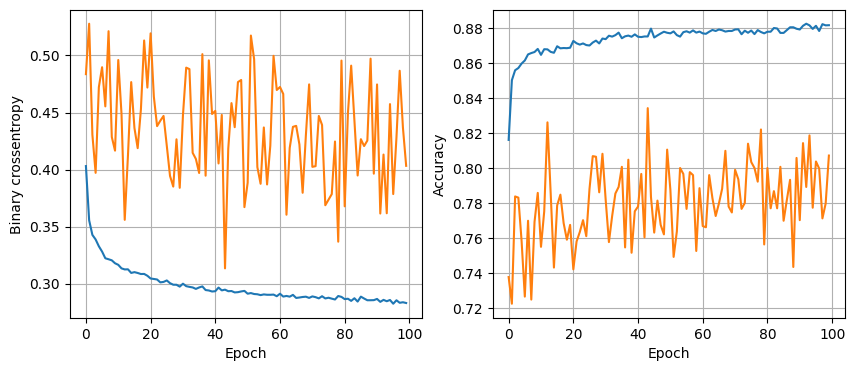

119/119 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8764
16 nodes, dropout 0, lr 0.01, batch size 64


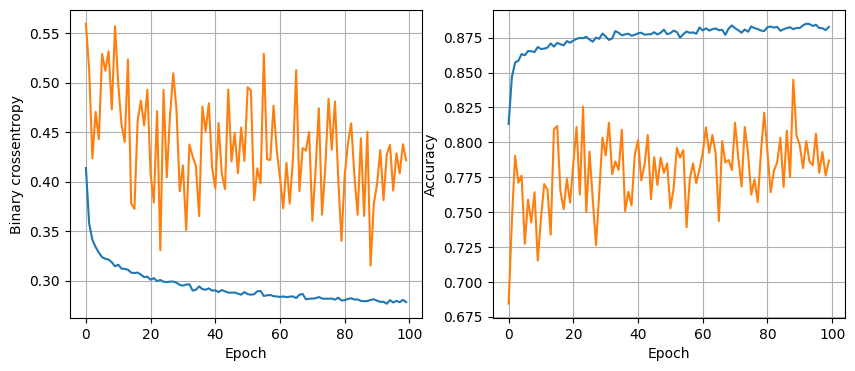

119/119 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.8796
16 nodes, dropout 0, lr 0.01, batch size 128


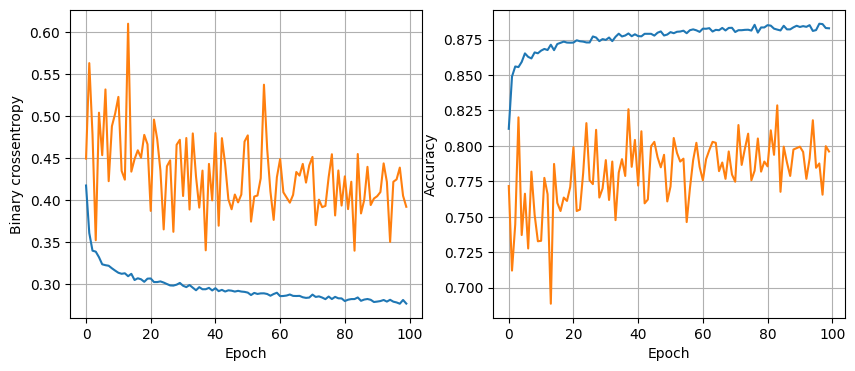

119/119 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.8862
16 nodes, dropout 0, lr 0.005, batch size 32


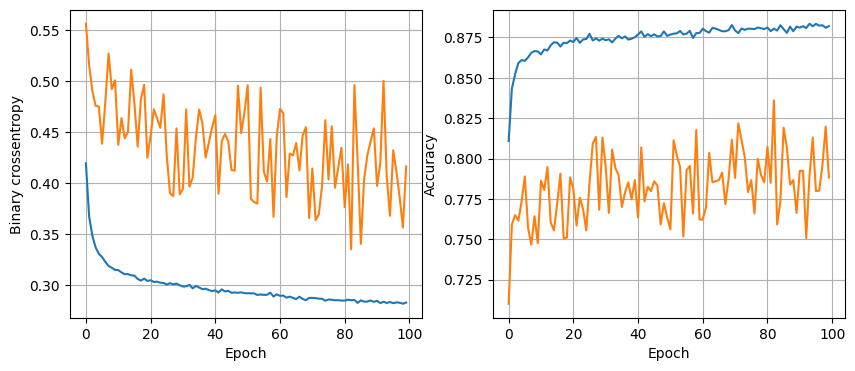

119/119 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8725
16 nodes, dropout 0, lr 0.005, batch size 64


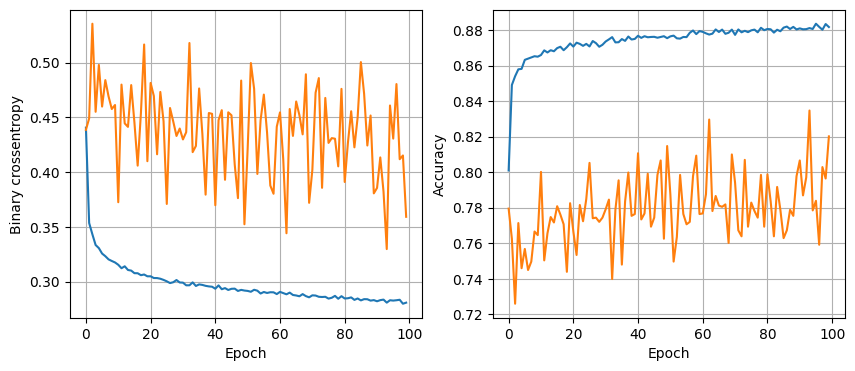

119/119 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8738
16 nodes, dropout 0, lr 0.005, batch size 128


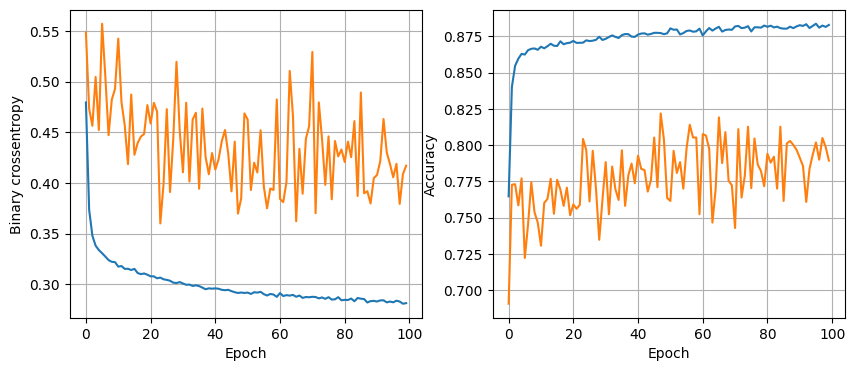

119/119 [==============================] - 1s 9ms/step - loss: 0.2941 - accuracy: 0.8799
16 nodes, dropout 0, lr 0.001, batch size 32


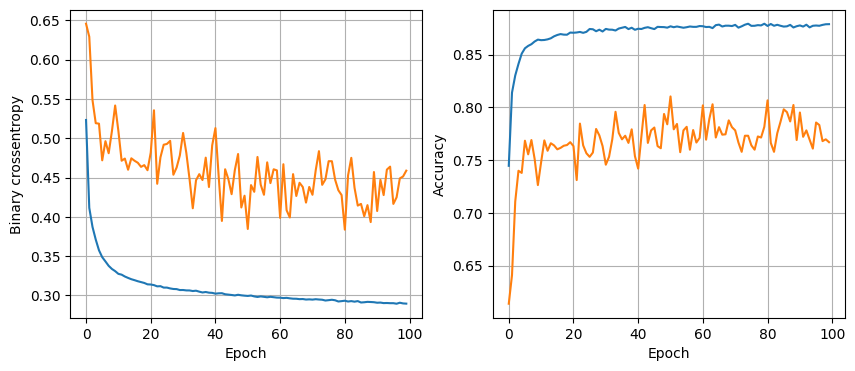

119/119 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8822
16 nodes, dropout 0, lr 0.001, batch size 64


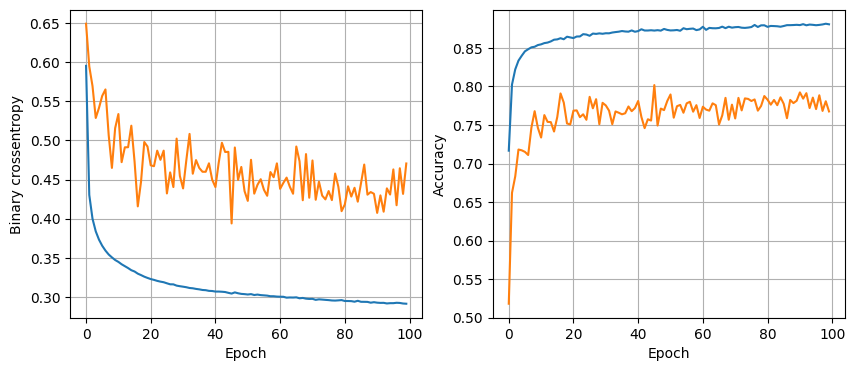

119/119 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8830
16 nodes, dropout 0, lr 0.001, batch size 128


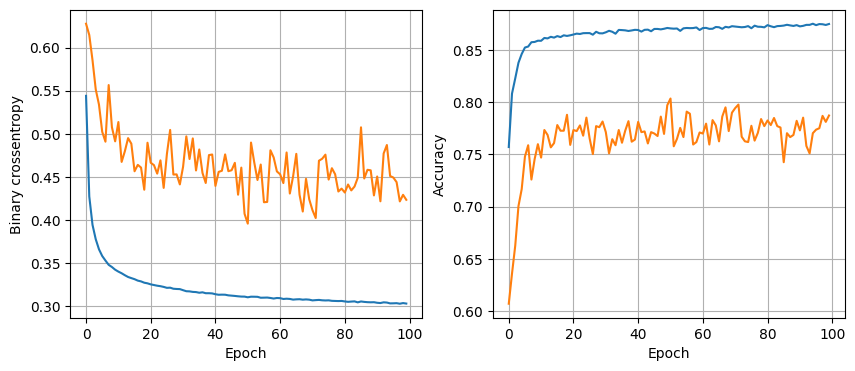

119/119 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8830
16 nodes, dropout 0.2, lr 0.01, batch size 32


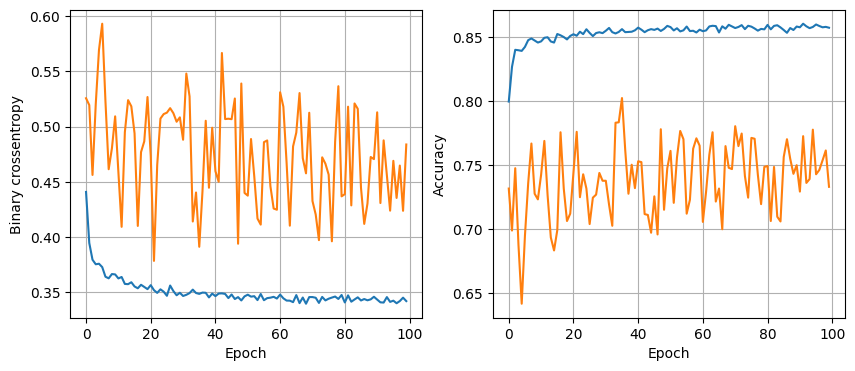

119/119 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8743
16 nodes, dropout 0.2, lr 0.01, batch size 64


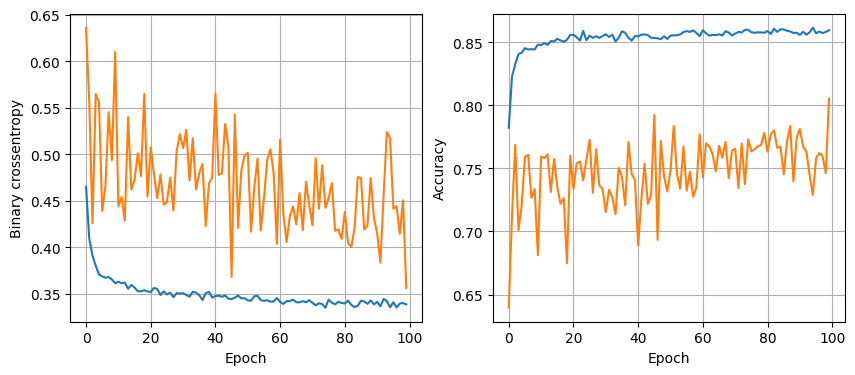

119/119 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.01, batch size 128


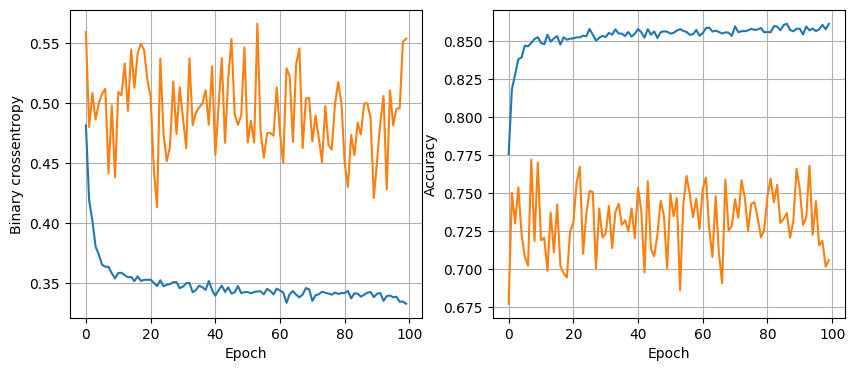

119/119 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.005, batch size 32


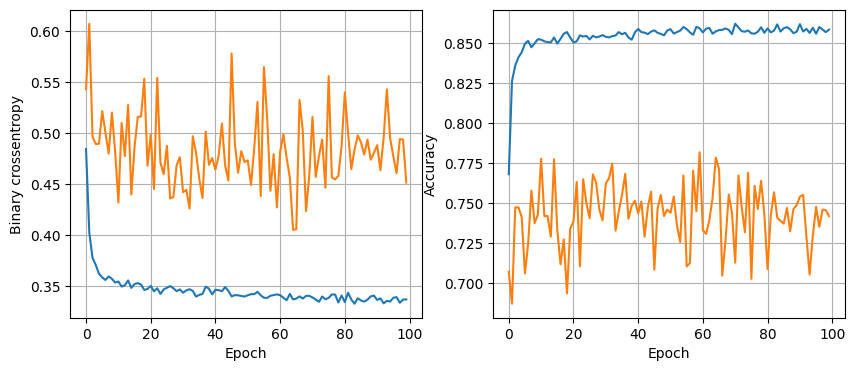

119/119 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8743
16 nodes, dropout 0.2, lr 0.005, batch size 64


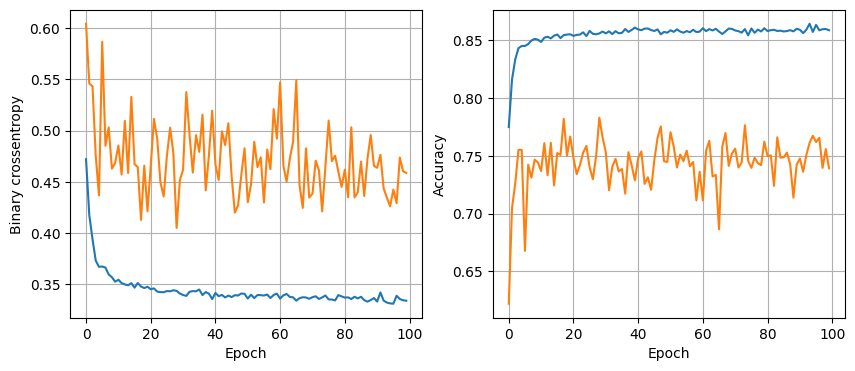

119/119 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8715
16 nodes, dropout 0.2, lr 0.005, batch size 128


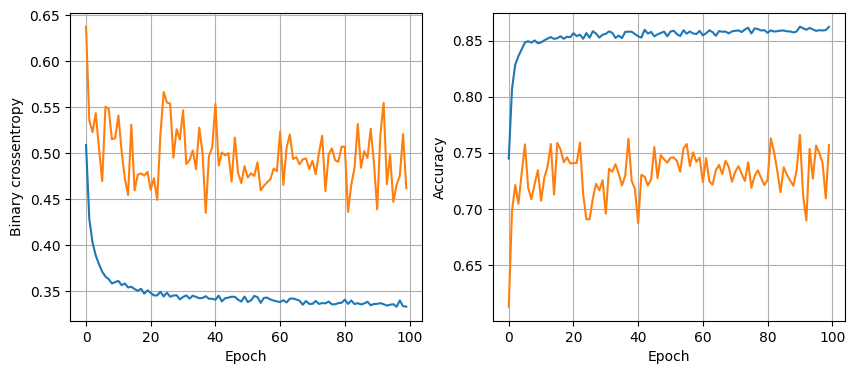

119/119 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8775
16 nodes, dropout 0.2, lr 0.001, batch size 32


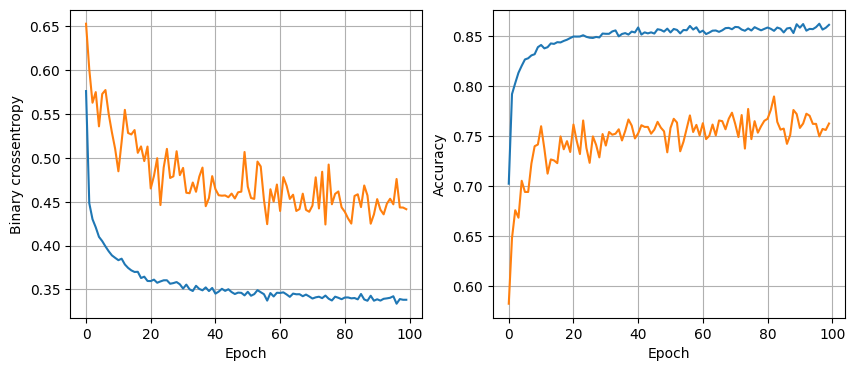

119/119 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8728
16 nodes, dropout 0.2, lr 0.001, batch size 64


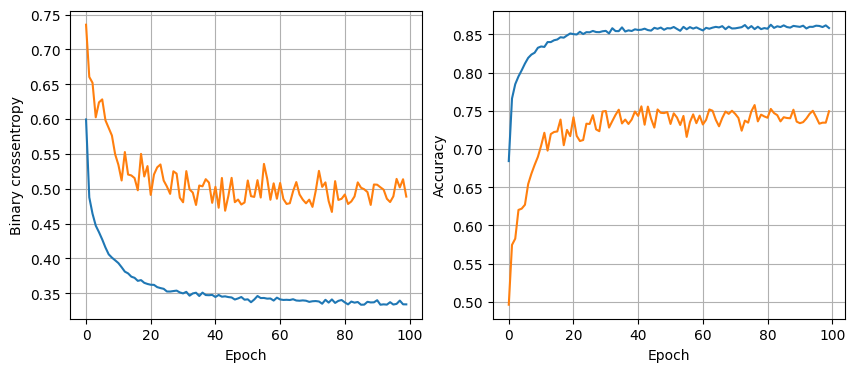

119/119 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8757
16 nodes, dropout 0.2, lr 0.001, batch size 128


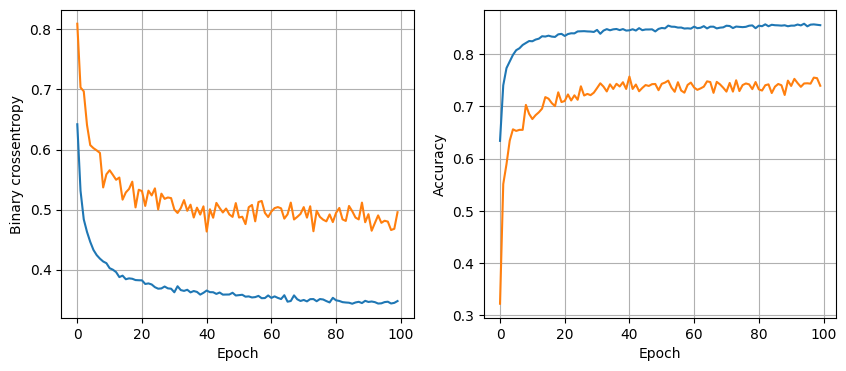

119/119 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8762
32 nodes, dropout 0, lr 0.01, batch size 32


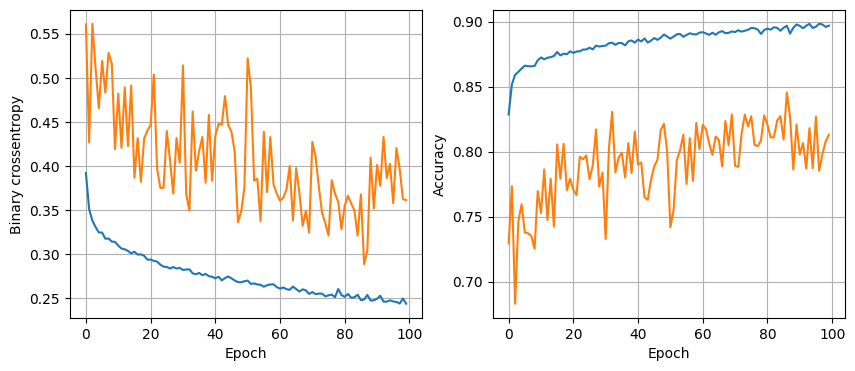

119/119 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8775
32 nodes, dropout 0, lr 0.01, batch size 64


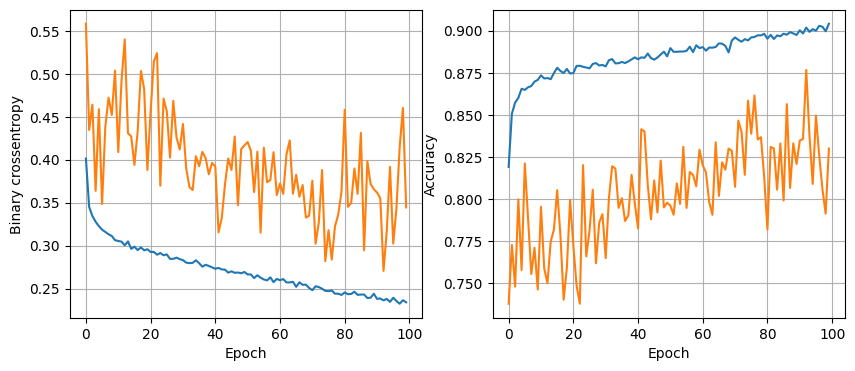

119/119 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.8722
32 nodes, dropout 0, lr 0.01, batch size 128


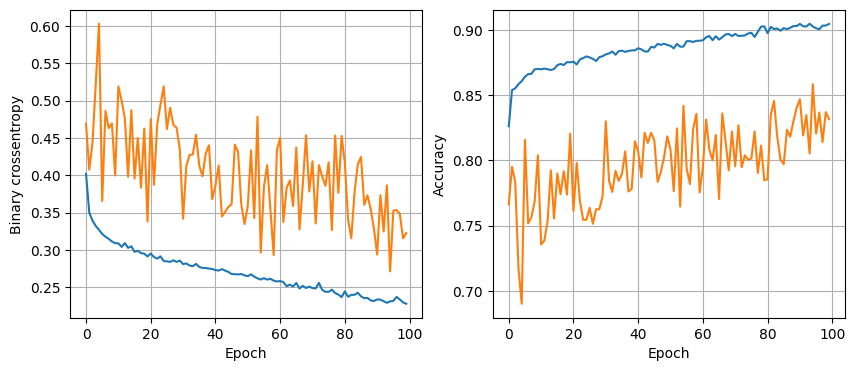

119/119 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8783
32 nodes, dropout 0, lr 0.005, batch size 32


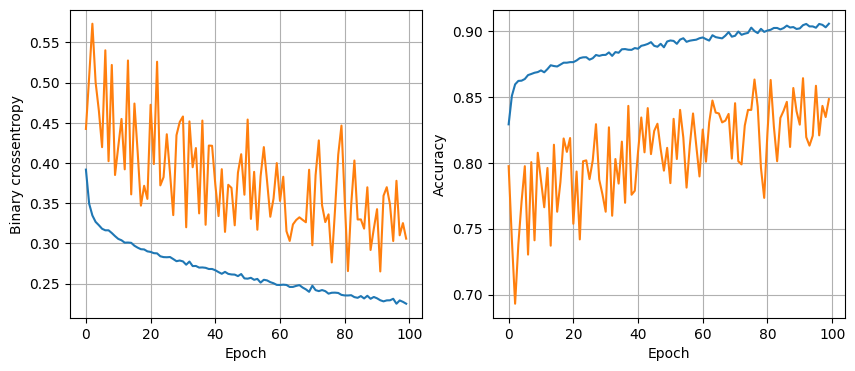

119/119 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8712
32 nodes, dropout 0, lr 0.005, batch size 64


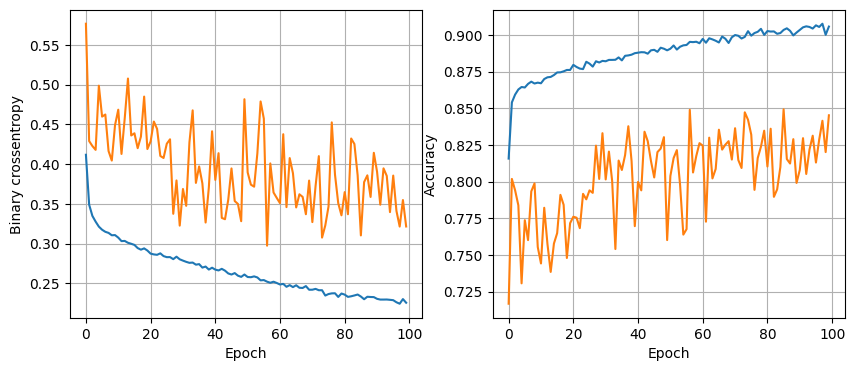

119/119 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.005, batch size 128


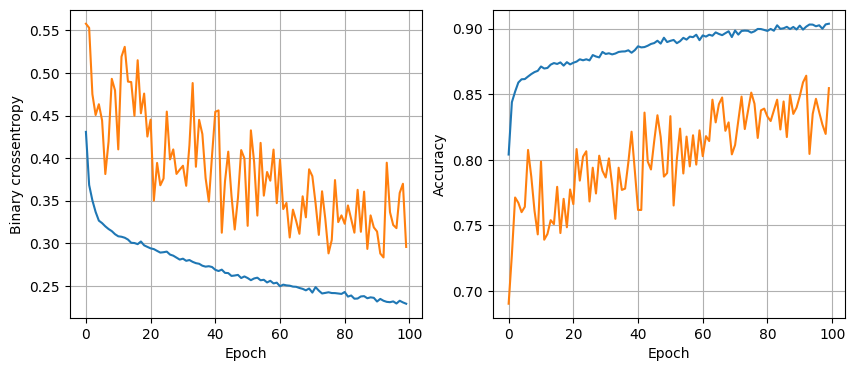

119/119 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8728
32 nodes, dropout 0, lr 0.001, batch size 32


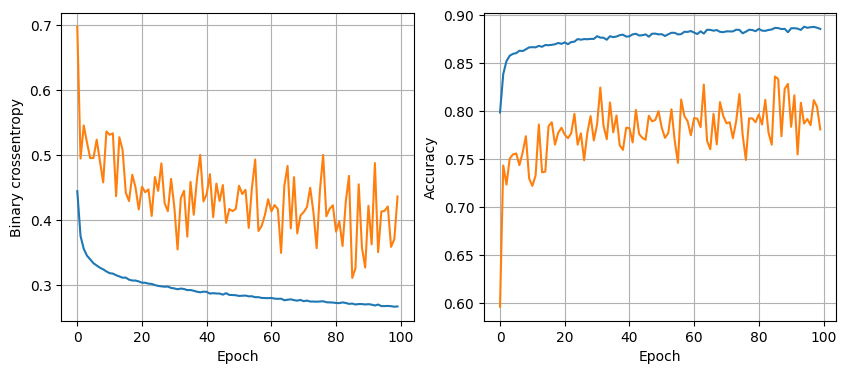

119/119 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.8783
32 nodes, dropout 0, lr 0.001, batch size 64


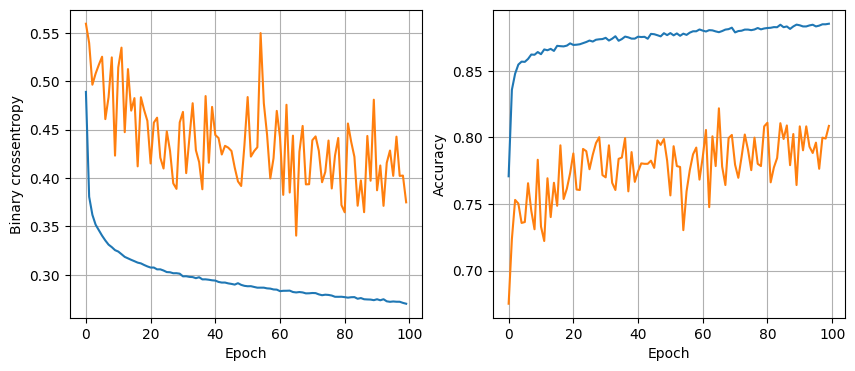

119/119 [==============================] - 0s 3ms/step - loss: 0.2986 - accuracy: 0.8775
32 nodes, dropout 0, lr 0.001, batch size 128


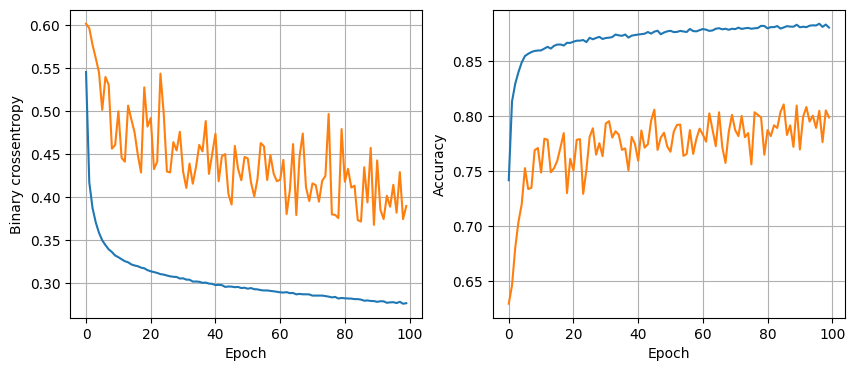

119/119 [==============================] - 1s 4ms/step - loss: 0.2952 - accuracy: 0.8812
32 nodes, dropout 0.2, lr 0.01, batch size 32


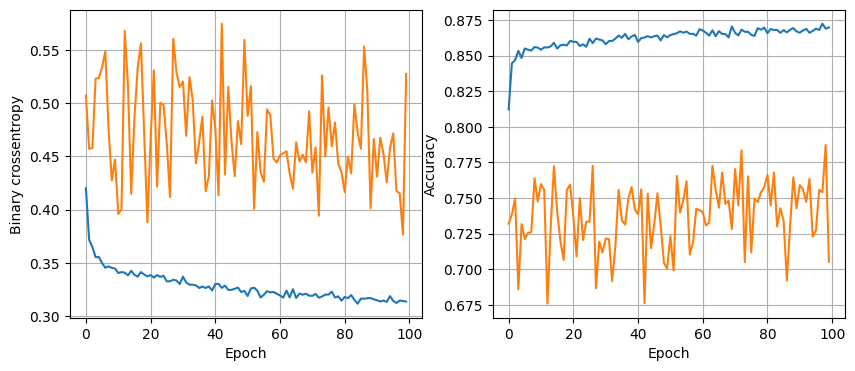

119/119 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.01, batch size 64


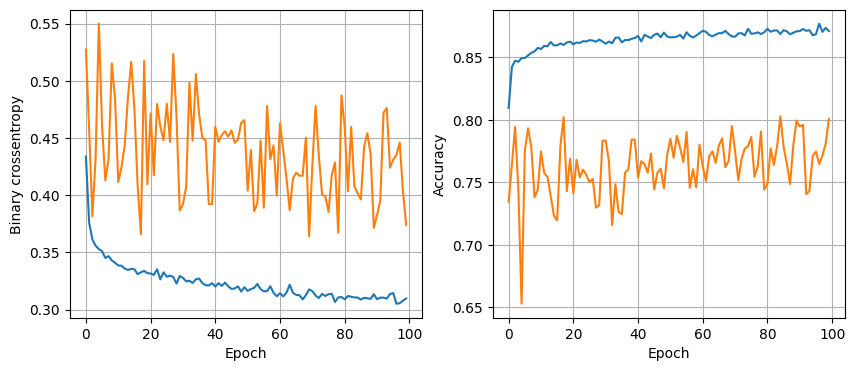

119/119 [==============================] - 0s 3ms/step - loss: 0.2938 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.01, batch size 128


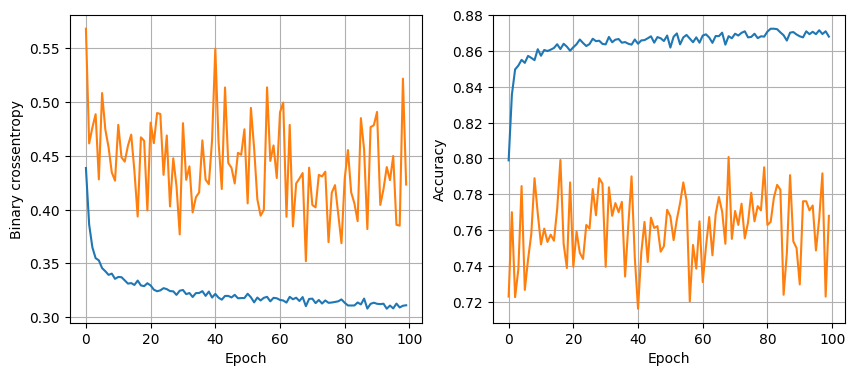

119/119 [==============================] - 0s 3ms/step - loss: 0.2891 - accuracy: 0.8833
32 nodes, dropout 0.2, lr 0.005, batch size 32


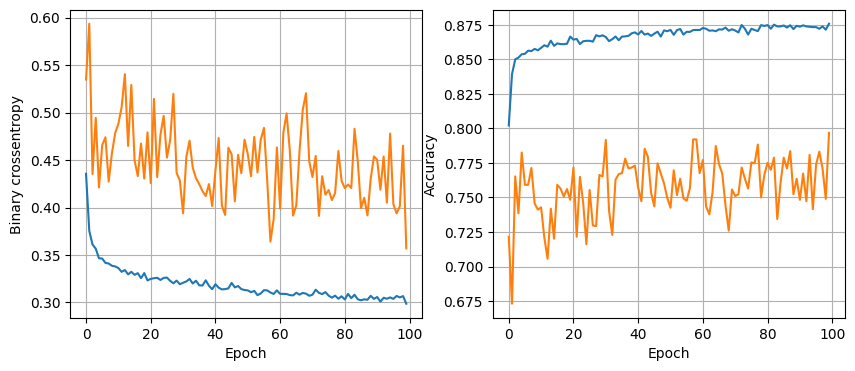

119/119 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.8820
32 nodes, dropout 0.2, lr 0.005, batch size 64


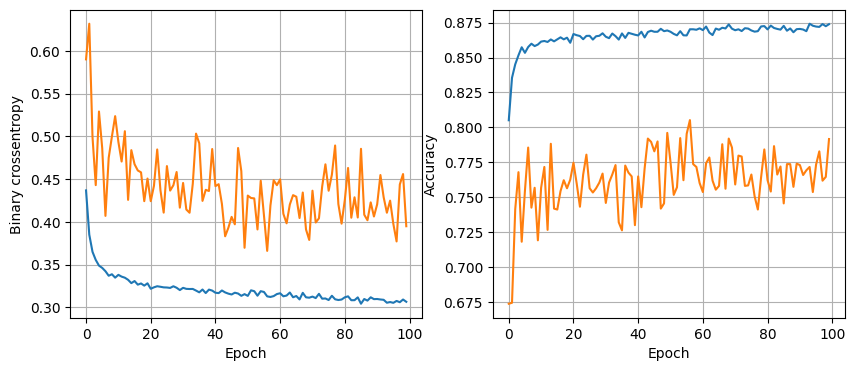

119/119 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.8807
32 nodes, dropout 0.2, lr 0.005, batch size 128


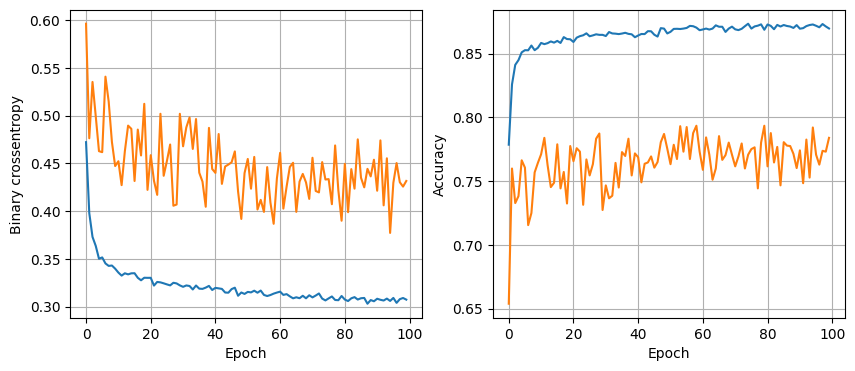

119/119 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.8822
32 nodes, dropout 0.2, lr 0.001, batch size 32


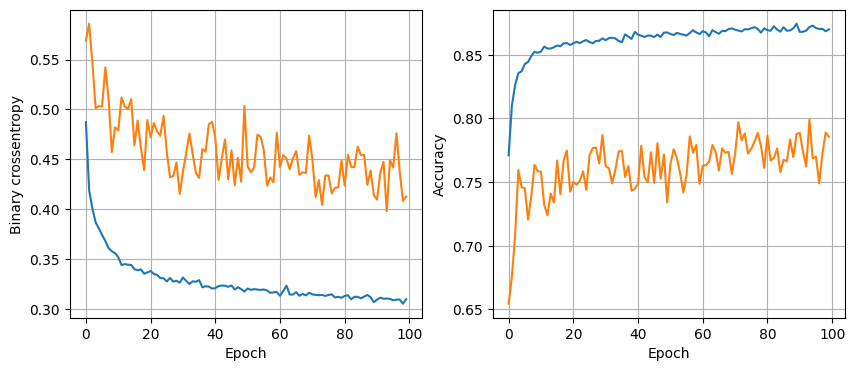

119/119 [==============================] - 0s 3ms/step - loss: 0.2935 - accuracy: 0.8799
32 nodes, dropout 0.2, lr 0.001, batch size 64


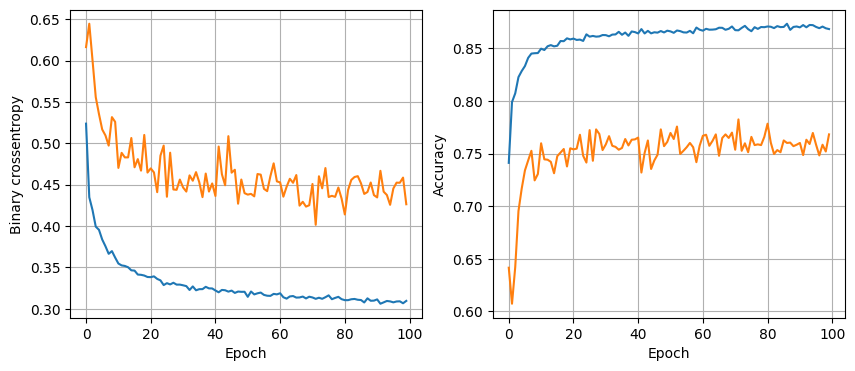

119/119 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.8835
32 nodes, dropout 0.2, lr 0.001, batch size 128


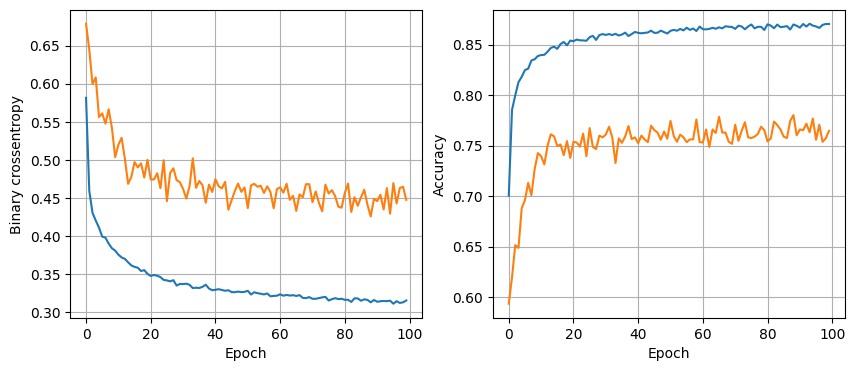

119/119 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.8835
64 nodes, dropout 0, lr 0.01, batch size 32


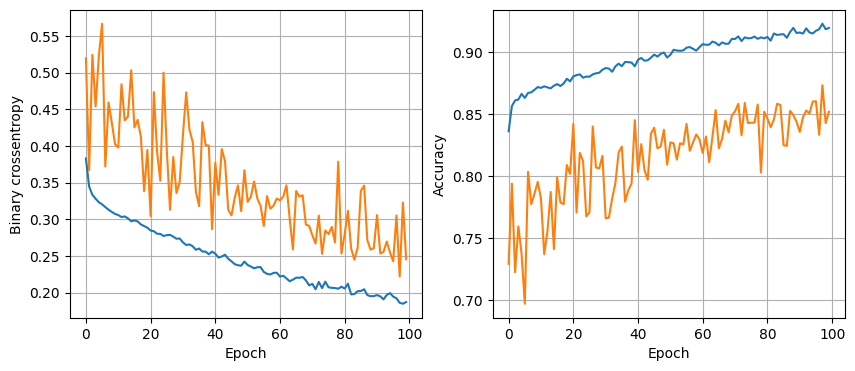

119/119 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.8654
64 nodes, dropout 0, lr 0.01, batch size 64


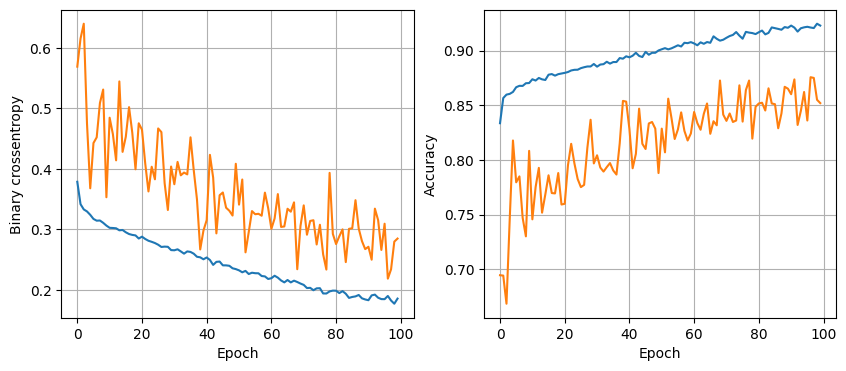

119/119 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.8615
64 nodes, dropout 0, lr 0.01, batch size 128


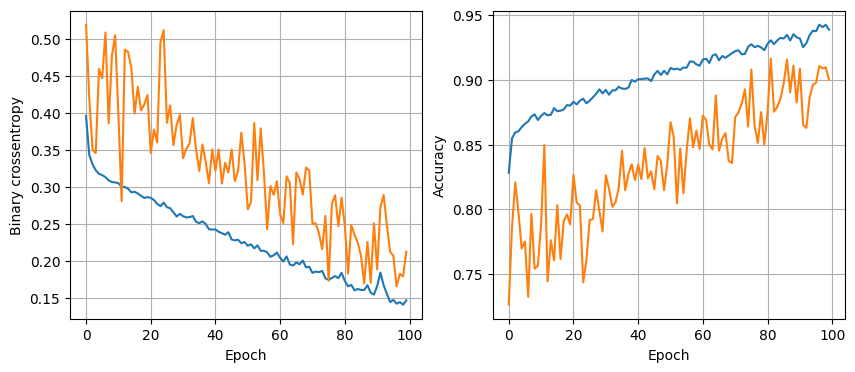

119/119 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.8591
64 nodes, dropout 0, lr 0.005, batch size 32


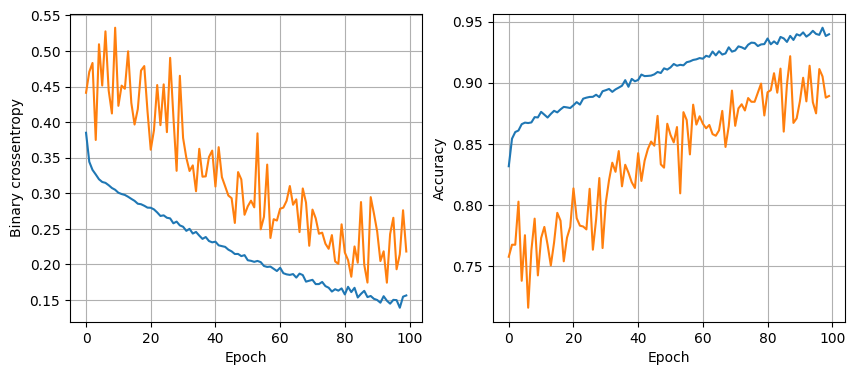

119/119 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.8625
64 nodes, dropout 0, lr 0.005, batch size 64


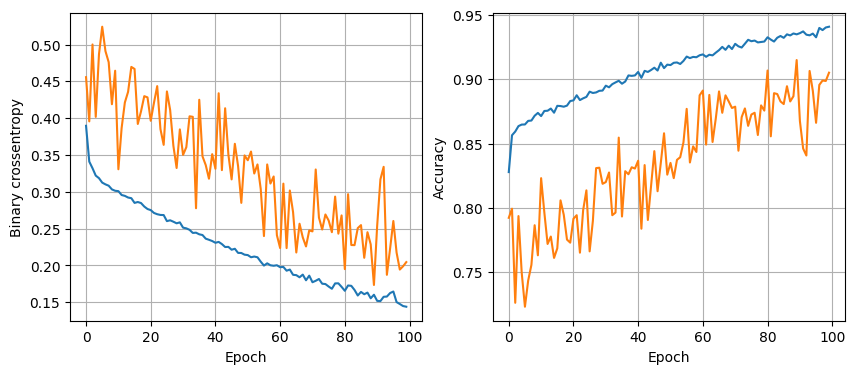

119/119 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.8607
64 nodes, dropout 0, lr 0.005, batch size 128


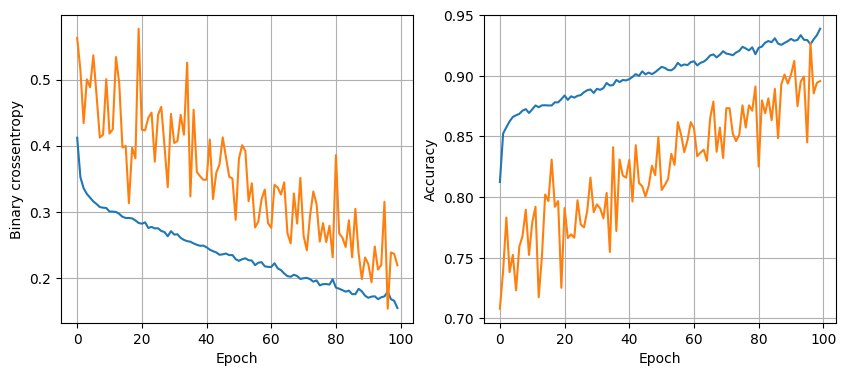

119/119 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.8641
64 nodes, dropout 0, lr 0.001, batch size 32


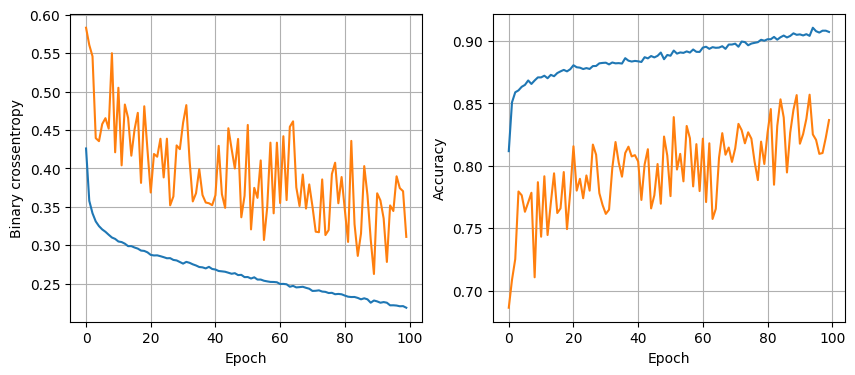

119/119 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8775
64 nodes, dropout 0, lr 0.001, batch size 64


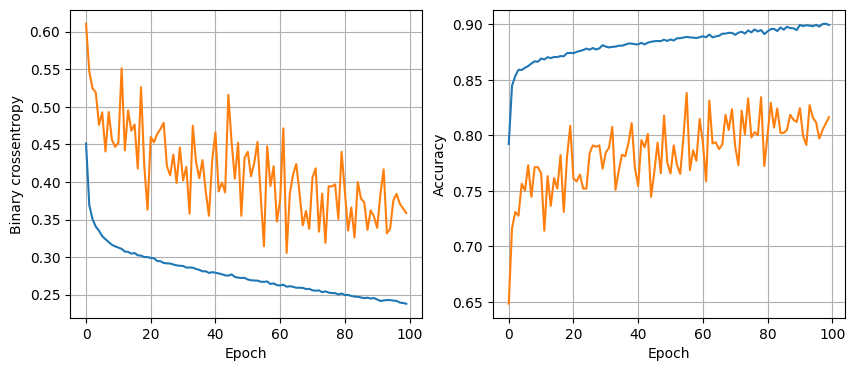

119/119 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.8743
64 nodes, dropout 0, lr 0.001, batch size 128


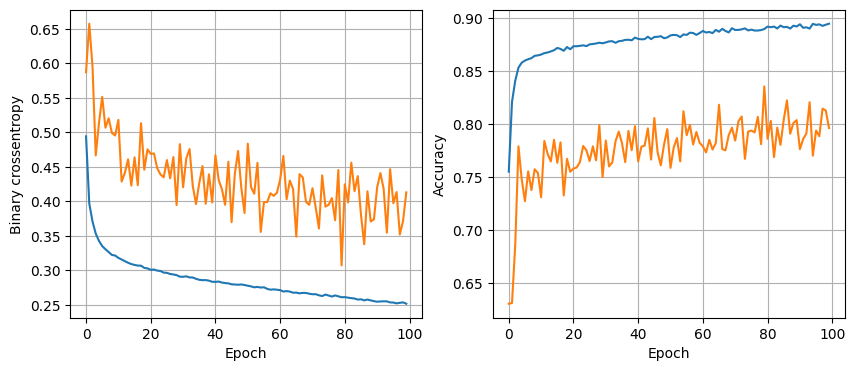

119/119 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8817
64 nodes, dropout 0.2, lr 0.01, batch size 32


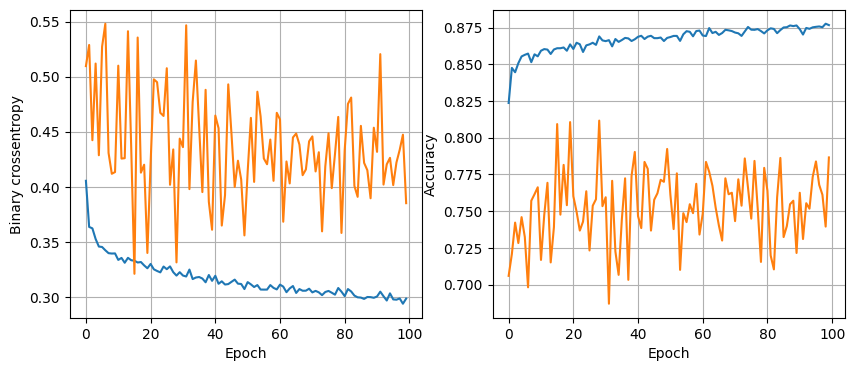

119/119 [==============================] - 0s 3ms/step - loss: 0.2936 - accuracy: 0.8817
64 nodes, dropout 0.2, lr 0.01, batch size 64


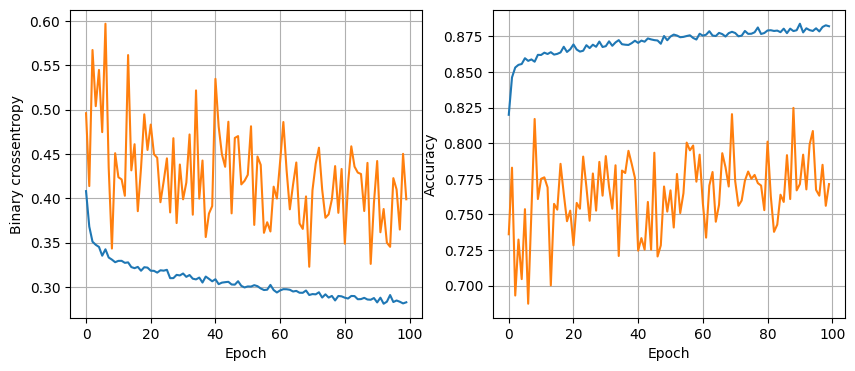

119/119 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.8875
64 nodes, dropout 0.2, lr 0.01, batch size 128


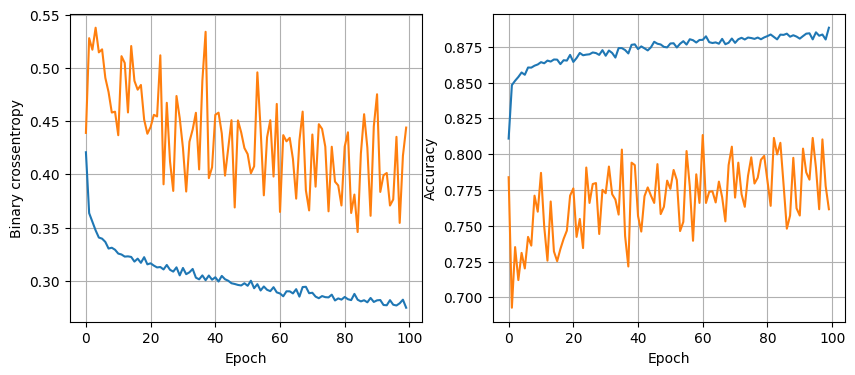

119/119 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.8799
64 nodes, dropout 0.2, lr 0.005, batch size 32


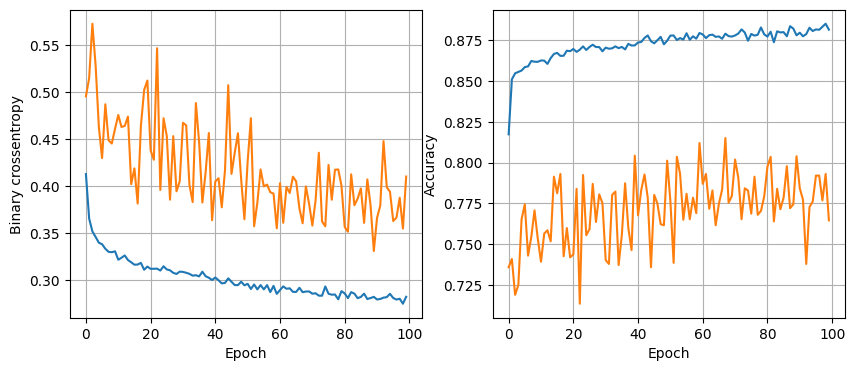

119/119 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.8859
64 nodes, dropout 0.2, lr 0.005, batch size 64


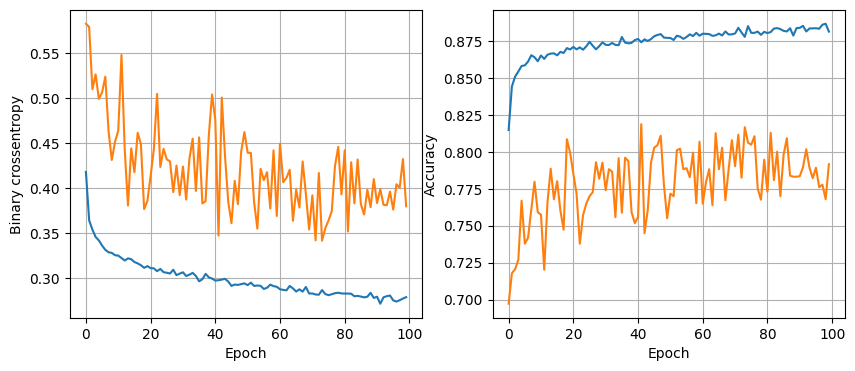

119/119 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.8904
64 nodes, dropout 0.2, lr 0.005, batch size 128


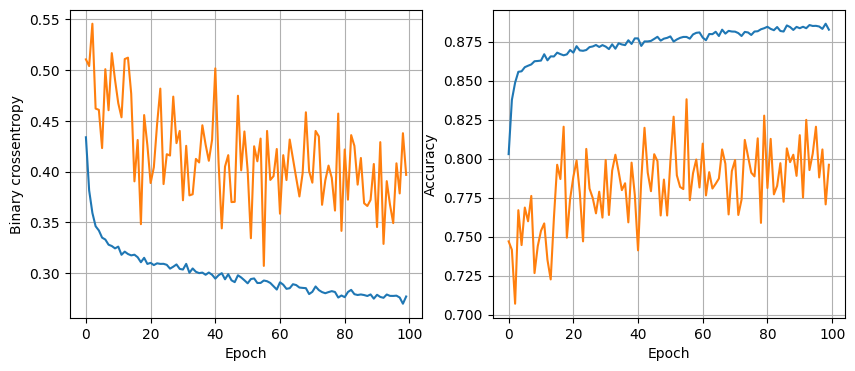

119/119 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.8877
64 nodes, dropout 0.2, lr 0.001, batch size 32


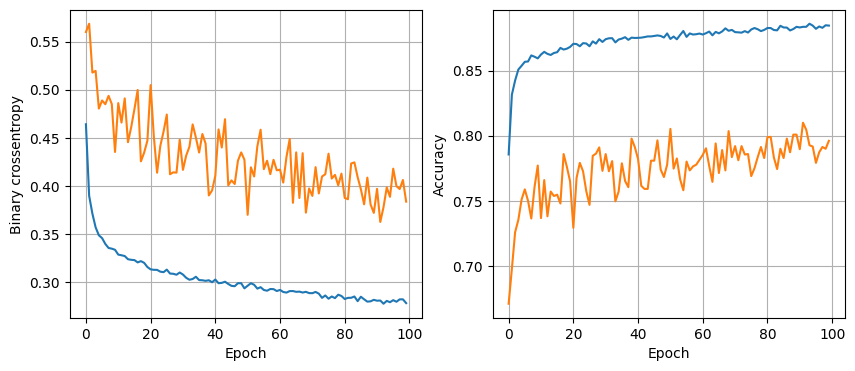

119/119 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.8846
64 nodes, dropout 0.2, lr 0.001, batch size 64


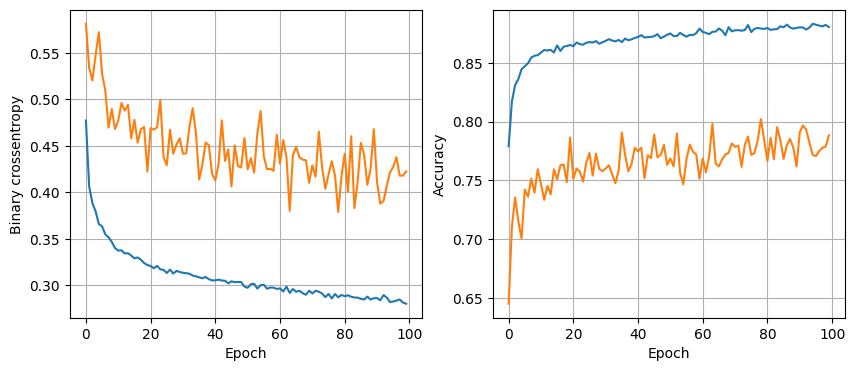

119/119 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.8862
64 nodes, dropout 0.2, lr 0.001, batch size 128


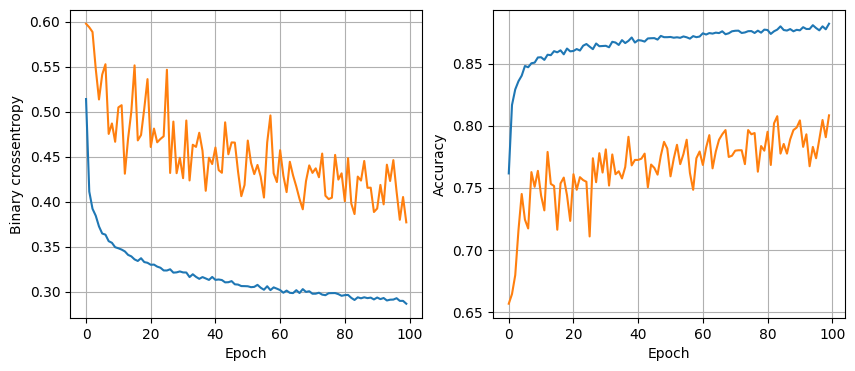

119/119 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.8825


In [30]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [32]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1357
           1       0.87      0.94      0.90      2447

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.86      3804

